<a href="https://colab.research.google.com/github/AryanSai/Deep-Learning/blob/main/23352_Asmt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Consider a neural network with 4 layers of 500 neurons each. Initialize the weights of each of these layers to samples from Gaussian with mean 0 and standard deviation 0.01. The i/p layer consists of 1000 features randomly sampled from the standard Gaussian. Do only the forward propagation once of the input with tanh as the activation function in all the layers. At the end of forward propagation, plot layer-wise (including input layer) histogram of activation values. What do you observe?

In [10]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [17]:

class NeuralNetwork(nn.Module):
    def __init__(self,act_function,meann,sd=0,weights=0):
        super().__init__()

        self.inputLayer = nn.Linear(1000, 500)
        self.layer1 = nn.Linear(500, 500)
        self.layer2 = nn.Linear(500, 500)
        self.outputlayer = nn.Linear(500, 10)

        self.init_weights(self.inputLayer.weight, weights, meann, sd)
        self.init_weights(self.layer1.weight, weights, meann, sd)
        self.init_weights(self.layer2.weight, weights, meann, sd)
        self.init_weights(self.outputlayer.weight, weights, meann, sd)

        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            self.inputLayer,
            act_function,
            self.layer1,
            act_function,
            self.layer2,
            act_function,
            self.outputlayer,
            act_function,
        )

    def init_weights(self, tensor, method,meann,sd):
        if method == 'xavier':
            nn.init.xavier_normal_(tensor)
        elif method == 'he':
            nn.init.kaiming_uniform_(tensor, mode='fan_in', nonlinearity='relu')
        elif method == 'normal':
            nn.init.normal_(tensor, mean=meann, std=sd)
        else:
            raise ValueError(f"Unsupported initialization method: {method}")

    def forward(self, x, act_function):
        self.activations = [x]
        for layer in self.linear_stack:
            x = layer(x)
            if type(layer) == type(act_function): #detach since we dont need gradients
                self.activations.append(x.detach().numpy().flatten())  # collect activations after Tanh layer
        return x

In [18]:
def create_model(act_function,weights,mean=0,sd=0):
  # create a model
  model = NeuralNetwork(act_function,mean,sd,weights)

  # forward propagation (activations are also collected during the pass)
  x = torch.randn(1, 1000)
  predictions = model(x,act_function)

  return model

def plot_histogram(model,act_function):
  # Histograms plotting
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
  axes = axes.flatten()

  # Collect and plot the layer activations
  for i, activation in enumerate(model.activations):
      if i==0:
        axes[i].hist(activation, bins=50)
        axes[i].set_title(f'Input Layer Activation Histogram')
      else:
        axes[i].hist(activation, bins=50)
        axes[i].set_title(f'{act_function} Layer {i} Activation Histogram')

  plt.tight_layout()
  plt.show()

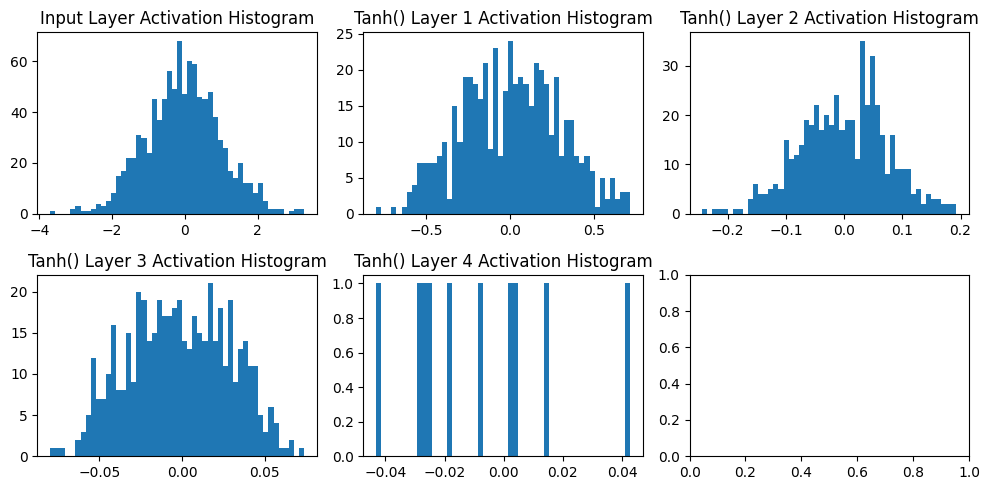

In [19]:
#tan h activation function
act_function=nn.Tanh()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

# 2. Repeat the above experiment for sigmoid activation. What do you observe?

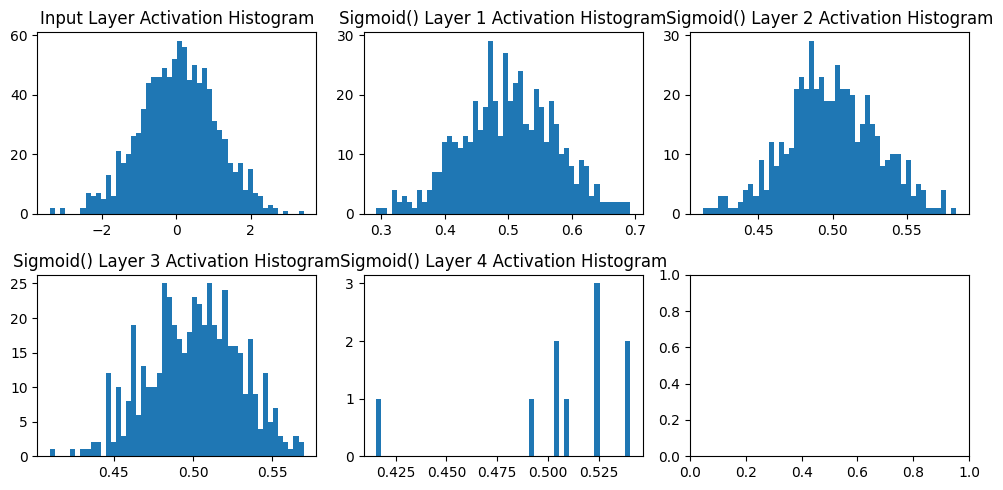

In [ ]:
#sigmoid activation function
act_function=nn.Sigmoid()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

# 3. Repeat the above experiment for ReLU activation. What do you observe?

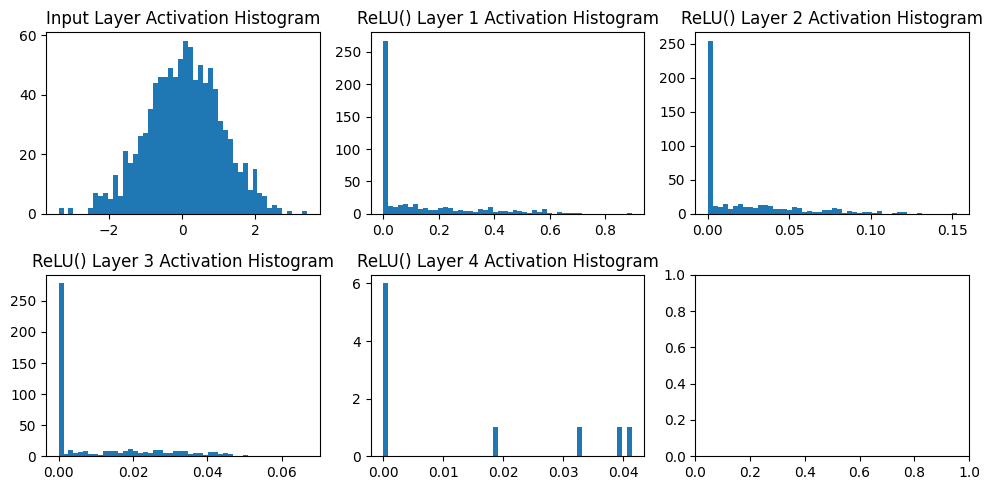

In [ ]:
#relu activation function
act_function=nn.ReLU()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

# 4. Repeat the above experiment again for tanh, sigmoid and ReLU, but now with weights initialized to samples from standard Gaussian. What do you observe?

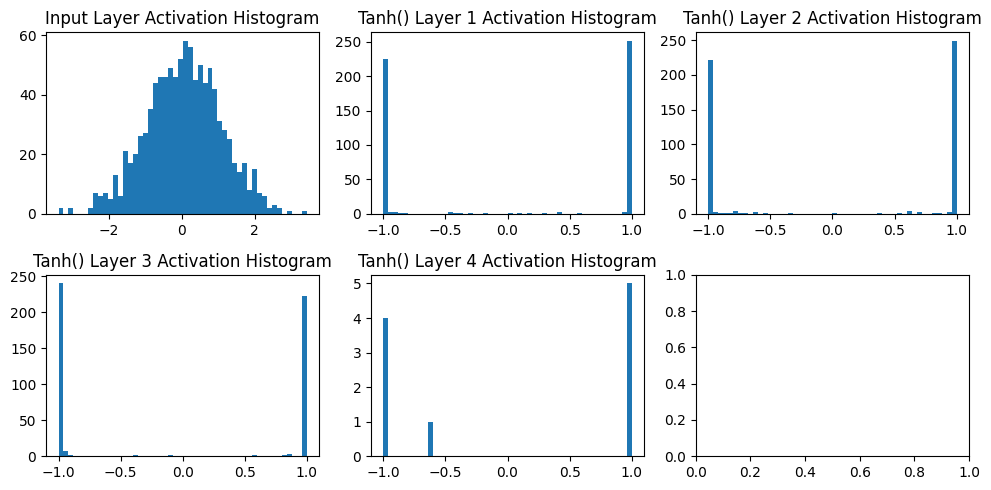

In [ ]:
#Tanh activation function with weights initialized to samples from standard Gaussian
act_function=nn.Tanh()
model = create_model(act_function,0,1,'normal')
plot_histogram(model,act_function)

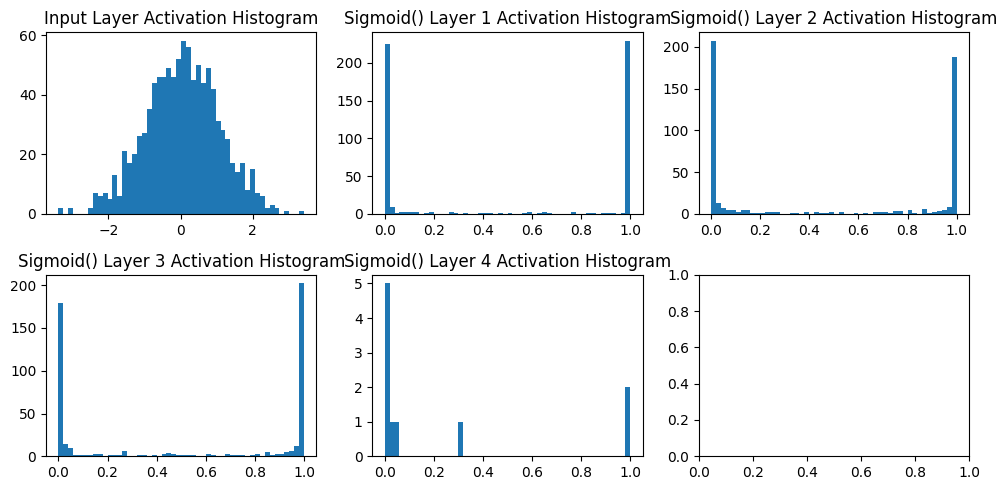

In [ ]:
#Tanh activation function with weights initialized to samples from standard Gaussian
act_function=nn.Sigmoid()
model = create_model(act_function,0,1,'normal')
plot_histogram(model,act_function)

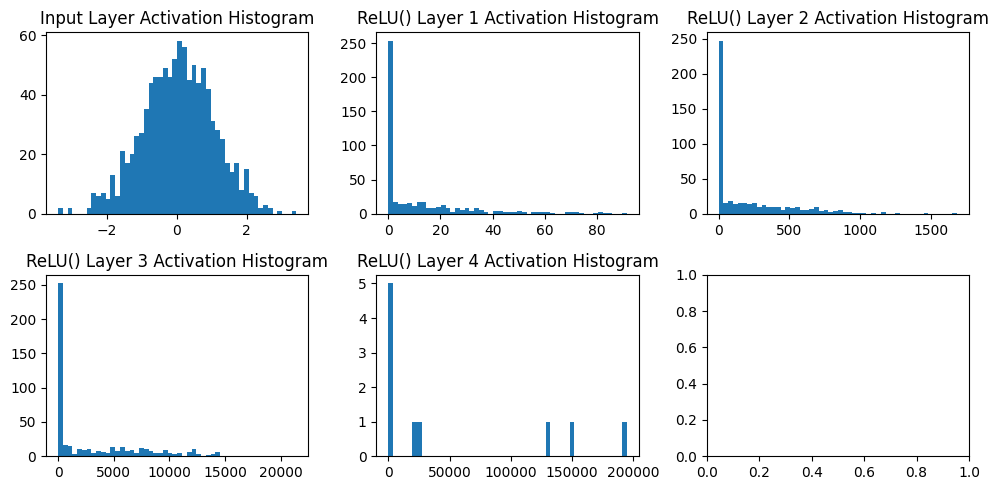

In [ ]:
#relu activation function with weights initialized to samples from standard Gaussian
act_function=nn.ReLU()
model = create_model(act_function,0,1,'normal')
plot_histogram(model,act_function)

# 5. Now repeat the above experiment with Xavier Weight Initialization on all the 3 activations. What do you observe?

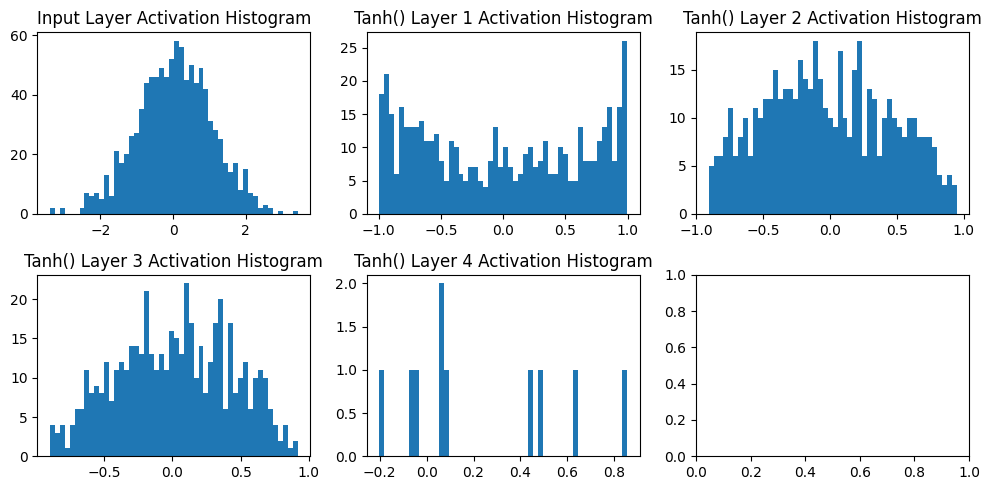

In [ ]:
#Tanh activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.Tanh()
model = create_model(act_function,'xavier')
plot_histogram(model,act_function)

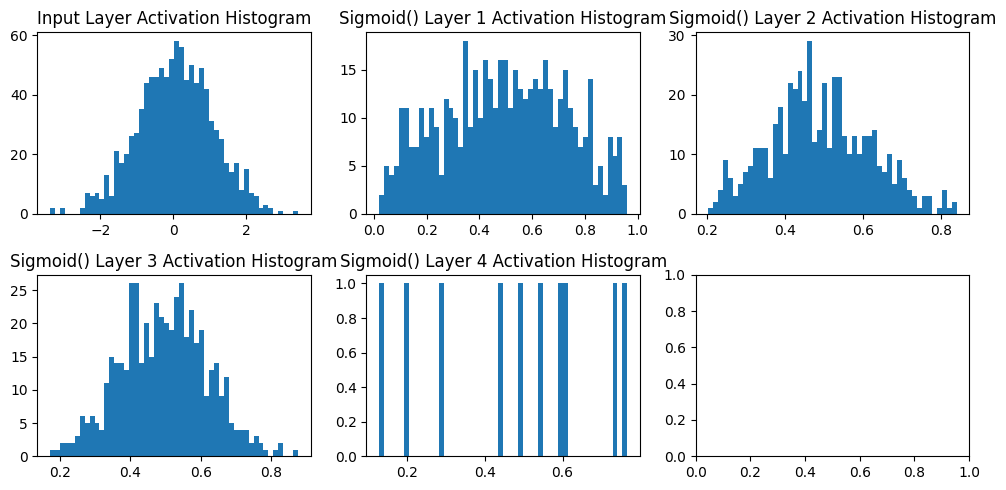

In [ ]:
#Sigmoid activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.Sigmoid()
model = create_model(act_function,'xavier')
plot_histogram(model,act_function)

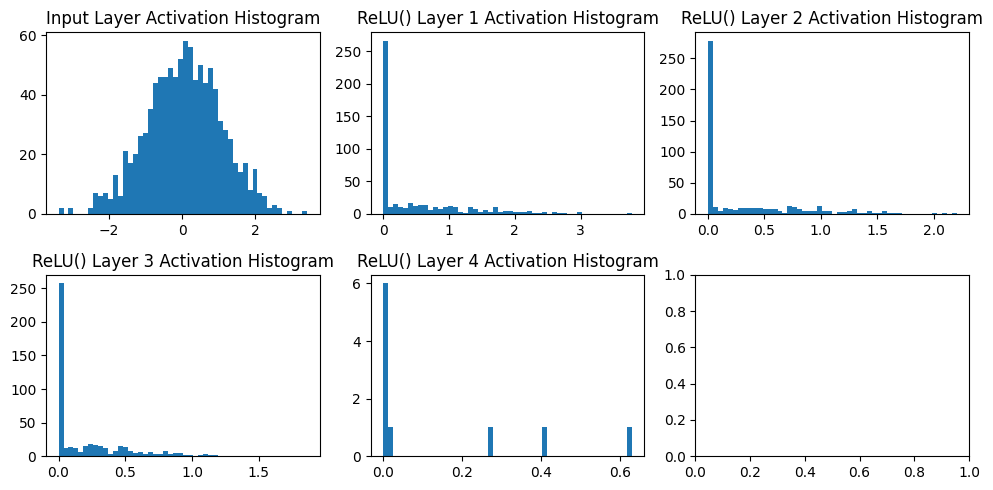

In [ ]:
#ReLu activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.ReLU()
model = create_model(act_function,weights='xavier')
plot_histogram(model,act_function)

# 6. Now repeat the above experiment with He Weight Initialization on all the 3 activations. What do you observe?

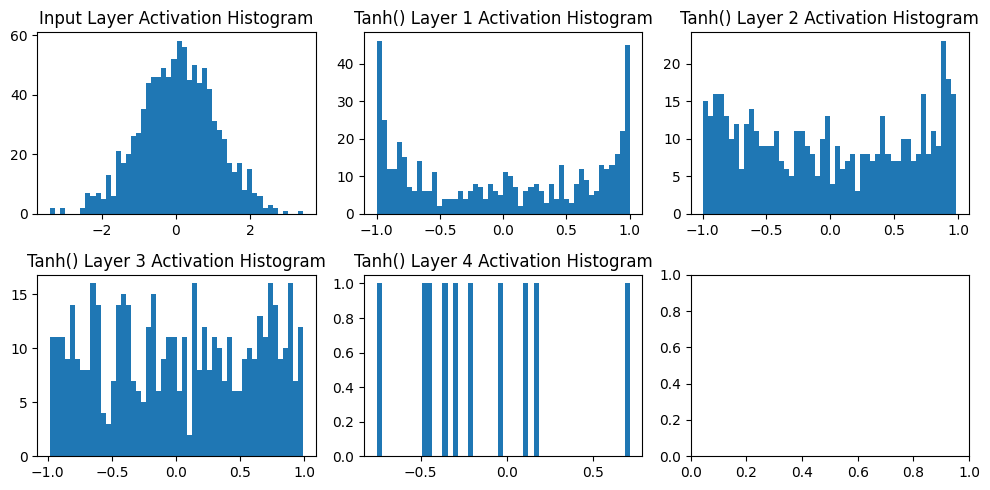

In [ ]:
#Tanh activation function with weights initialized to samples from He Initialisation
act_function=nn.Tanh()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

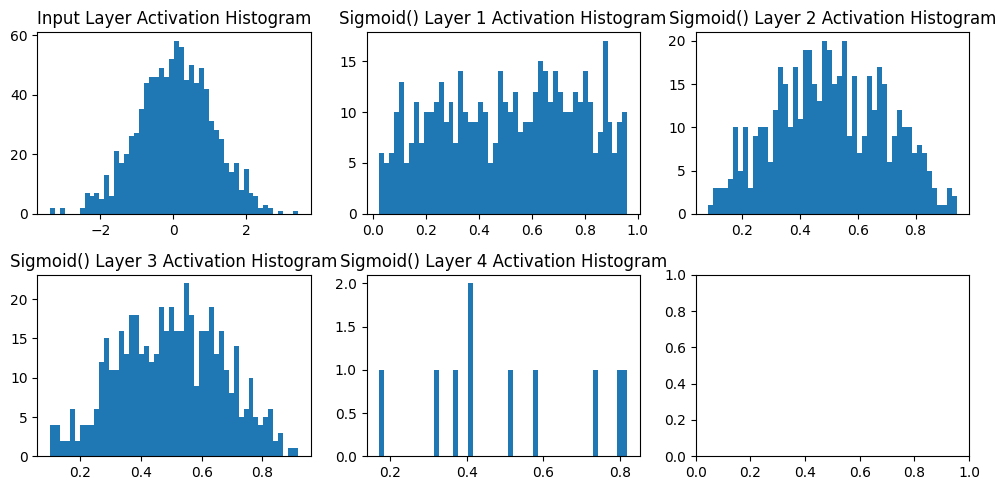

In [ ]:
#Sigmoid activation function with weights initialized to samples from He Initialisation
act_function=nn.Sigmoid()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

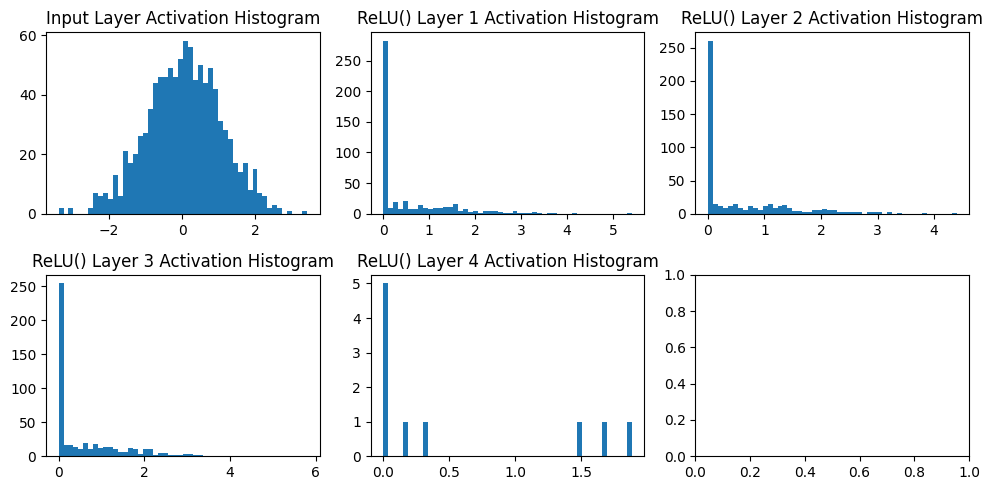

In [ ]:
#ReLu activation function with weights initialized to samples from He Initialisation
act_function=nn.ReLU()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

# 7. In the first lab assignment, use ReLU activation (in the hidden layers) and He weight initialization and train the model. Does the model train faster? Does it perform better on valid/test set?

In [24]:
import torch
from torch import nn #building blocks needed to build the NN
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#loading the training data
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
#loading the test data
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


#wraping iterators around the datasets
train_dataloader=DataLoader(training_data,batch_size=32)
test_dataloader=DataLoader(test_data,batch_size=32)

In [27]:


class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(128,10),
    )

     # HE initialization for linear layers
      for layer in self.linear_relu_stack.children():
          if isinstance(layer, nn.Linear):
              torch.nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [30]:

model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.366997  [   32/60000]
loss: 0.577947  [32032/60000]
Test Error: 
 Accuracy: 80.5%, Avg loss: 0.549960 

Epoch 2
-------------------------------
loss: 0.431302  [   32/60000]
loss: 0.532354  [32032/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.485890 

Epoch 3
-------------------------------
loss: 0.367970  [   32/60000]
loss: 0.526560  [32032/60000]
Test Error: 
 Accuracy: 84.1%, Avg loss: 0.451301 

Epoch 4
-------------------------------
loss: 0.341478  [   32/60000]
loss: 0.526797  [32032/60000]
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.431151 

Epoch 5
-------------------------------
loss: 0.312078  [   32/60000]
loss: 0.519952  [32032/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.417602 

Epoch 6
-------------------------------
loss: 0.298631  [   32/60000]
loss: 0.516787  [32032/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.405896 

Epoch 7
-------------------------------
loss: 0.276644  [   32/60000]
loss: 0.501751  [3

# HE Initilaisation
Epoch 1
-------------------------------
loss: 2.272978  [   32/60000]
loss: 0.626625  [32032/60000]
Test Error:
 Accuracy: 81.1%, Avg loss: 0.534437

Epoch 2
-------------------------------
loss: 0.365234  [   32/60000]
loss: 0.569238  [32032/60000]
Test Error:
 Accuracy: 83.0%, Avg loss: 0.483604


 Epoch 29
-------------------------------
loss: 0.198749  [   32/60000]
loss: 0.341078  [32032/60000]
Test Error:
 Accuracy: 87.8%, Avg loss: 0.348359

Epoch 30
-------------------------------
loss: 0.199789  [   32/60000]
loss: 0.343514  [32032/60000]
Test Error:
 Accuracy: 87.8%, Avg loss: 0.347042

Done!



# Initial Assignment

Epoch 29
-------------------------------
loss: 0.211019  [   32/60000]
loss: 0.434045  [32032/60000]
Test Error:
 Accuracy: 87.4%, Avg loss: 0.352406

Epoch 30
-------------------------------
loss: 0.219481  [   32/60000]
loss: 0.430037  [32032/60000]
Test Error:
 Accuracy: 87.4%, Avg loss: 0.351238

Done!

# 8. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Add batch normalization layer after every application of ReLU and train the model. Does the model train faster? Does it perform better on valid/test set? Compare the results with results from experiment 7.

# Batch Normalization

In [31]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.BatchNorm1d(64),
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.BatchNorm1d(128),
          nn.ReLU(),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [32]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.311009  [   32/60000]
loss: 0.621091  [32032/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.446896 

Epoch 2
-------------------------------
loss: 0.366716  [   32/60000]
loss: 0.501072  [32032/60000]
Test Error: 
 Accuracy: 85.7%, Avg loss: 0.405083 

Epoch 3
-------------------------------
loss: 0.314854  [   32/60000]
loss: 0.477085  [32032/60000]
Test Error: 
 Accuracy: 86.5%, Avg loss: 0.384623 

Epoch 4
-------------------------------
loss: 0.290679  [   32/60000]
loss: 0.429884  [32032/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.375311 

Epoch 5
-------------------------------
loss: 0.267430  [   32/60000]
loss: 0.400271  [32032/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.367641 

Epoch 6
-------------------------------
loss: 0.252590  [   32/60000]
loss: 0.375409  [32032/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.362231 

Epoch 7
-------------------------------
loss: 0.238429  [   32/60000]
loss: 0.356532  [3

# 9. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Deploy drop-out in every hidden layer. Retain/drop probabilities may be chosen by trial and error. Does the model perform better?

In [35]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [36]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.303278  [   32/60000]
loss: 0.933254  [32032/60000]
Test Error: 
 Accuracy: 72.9%, Avg loss: 0.724343 

Epoch 2
-------------------------------
loss: 0.684907  [   32/60000]
loss: 0.644554  [32032/60000]
Test Error: 
 Accuracy: 79.4%, Avg loss: 0.579813 

Epoch 3
-------------------------------
loss: 0.511190  [   32/60000]
loss: 0.528920  [32032/60000]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.515265 

Epoch 4
-------------------------------
loss: 0.508093  [   32/60000]
loss: 0.499551  [32032/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.477821 

Epoch 5
-------------------------------
loss: 0.478453  [   32/60000]
loss: 0.521097  [32032/60000]
Test Error: 
 Accuracy: 83.4%, Avg loss: 0.458656 

Epoch 6
-------------------------------
loss: 0.421853  [   32/60000]
loss: 0.502183  [32032/60000]
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.444922 

Epoch 7
-------------------------------
loss: 0.396317  [   32/60000]
loss: 0.557544  [3

# 10. Instead of drop-out, use L2 regularization. Regularization param may be chosen by trial and error. Does the model perform better?

In [37]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [38]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

#L2 regularisation
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.290291  [   32/60000]
loss: 0.748231  [32032/60000]
Test Error: 
 Accuracy: 76.7%, Avg loss: 0.663952 

Epoch 2
-------------------------------
loss: 0.546907  [   32/60000]
loss: 0.599881  [32032/60000]
Test Error: 
 Accuracy: 80.3%, Avg loss: 0.557486 

Epoch 3
-------------------------------
loss: 0.434406  [   32/60000]
loss: 0.545279  [32032/60000]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.517853 

Epoch 4
-------------------------------
loss: 0.365905  [   32/60000]
loss: 0.543745  [32032/60000]
Test Error: 
 Accuracy: 82.5%, Avg loss: 0.495582 

Epoch 5
-------------------------------
loss: 0.327460  [   32/60000]
loss: 0.546845  [32032/60000]
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.478872 

Epoch 6
-------------------------------
loss: 0.308690  [   32/60000]
loss: 0.534509  [32032/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.463752 

Epoch 7
-------------------------------
loss: 0.296765  [   32/60000]
loss: 0.529559  [3